In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Below is our first visualization for our first research question (“Does party support status cause a change in the likelihood of success in primary elections?”) showing the relationship between winning the primary and having respective party support (for both democratic and republican candidates).

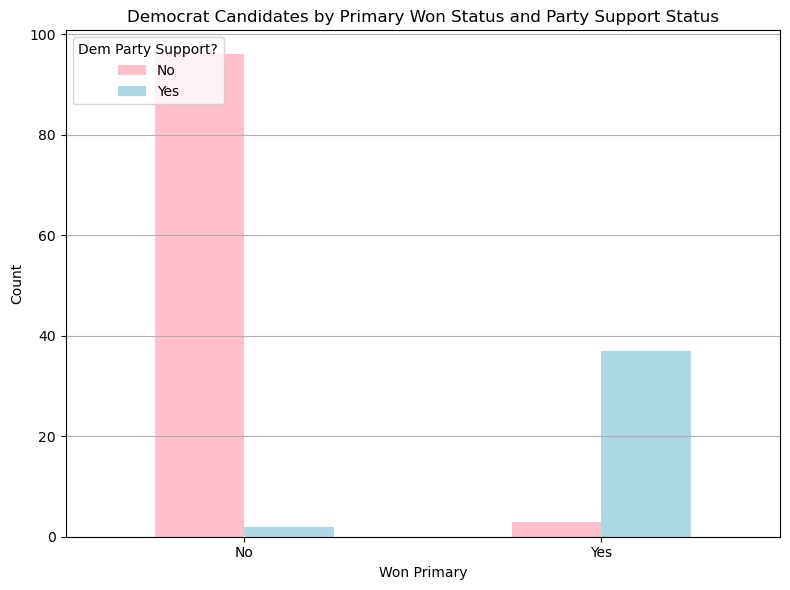

<Figure size 500x300 with 0 Axes>

In [2]:
dem = pd.read_csv("dem_candidates (1).csv", encoding='latin1')
rep = pd.read_csv("rep_candidates (1).csv", encoding='latin1')

dem_data = dem.groupby(['Won Primary','Party Support?']).size().unstack()


dem_data.plot(kind='bar', figsize=(8, 6), color=['pink', 'lightblue'])
plt.xlabel('Won Primary')
plt.ylabel('Count')
plt.title('Democrat Candidates by Primary Won Status and Party Support Status')
plt.legend(title='Dem Party Support?', loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.figure(figsize=(5,3))
plt.show()

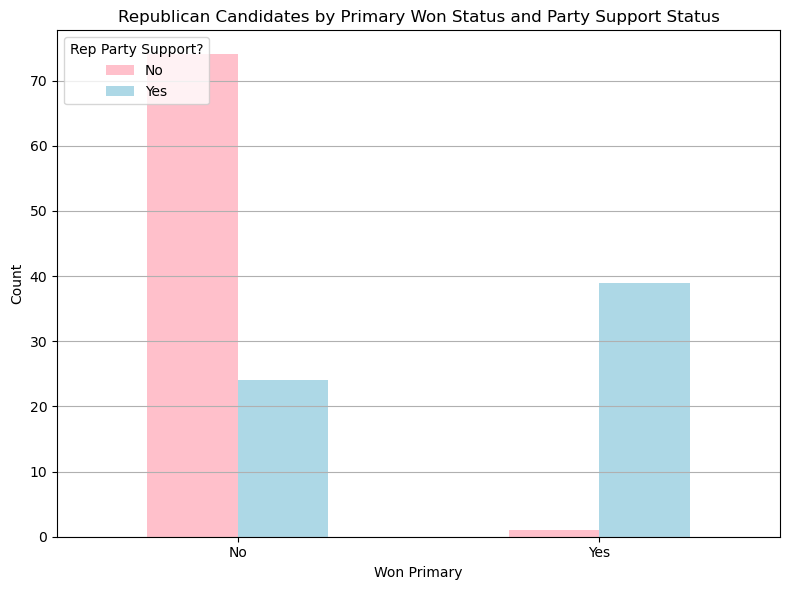

<Figure size 700x500 with 0 Axes>

In [3]:
rep_data = rep.groupby(['Won Primary','Rep Party Support?']).size().unstack()


rep_data.plot(kind='bar', figsize=(8, 6), color=['pink', 'lightblue'])
plt.xlabel('Won Primary')
plt.ylabel('Count')
plt.title('Republican Candidates by Primary Won Status and Party Support Status')
plt.legend(title='Rep Party Support?', loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.figure(figsize=(7,5))
plt.show()

Below is our second visualization for our first research question (“Does party support status cause a change in the likelihood of success in primary elections?”) showing countplots displaying the effect of a candidate's state on both the treatment (party support status) and the outcome (a candidate winning or losing their primary).

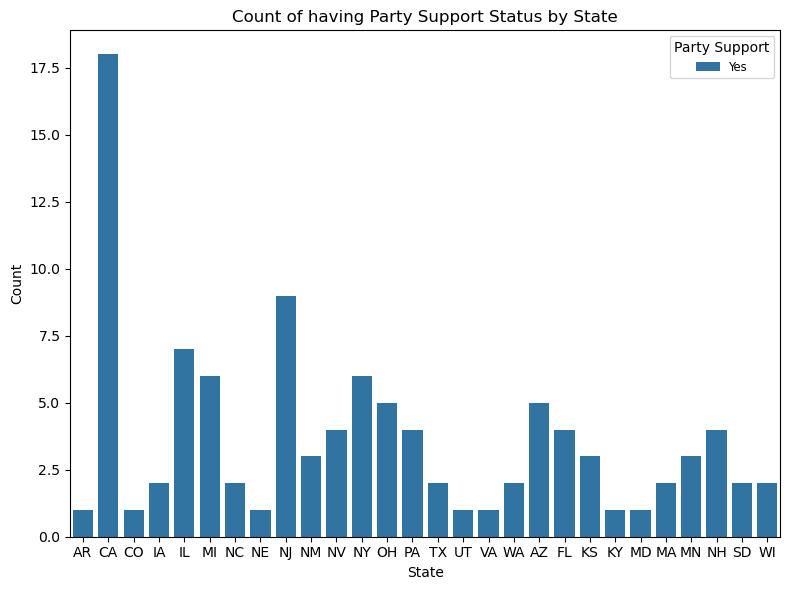

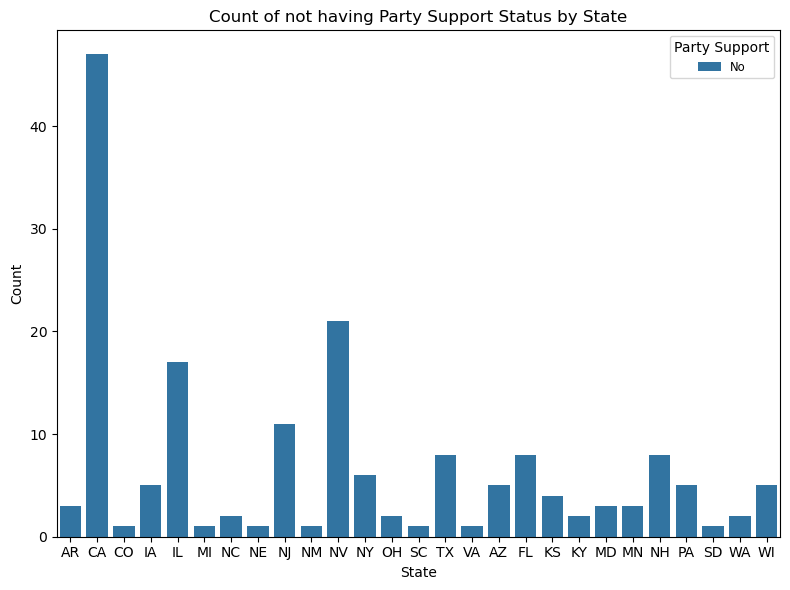

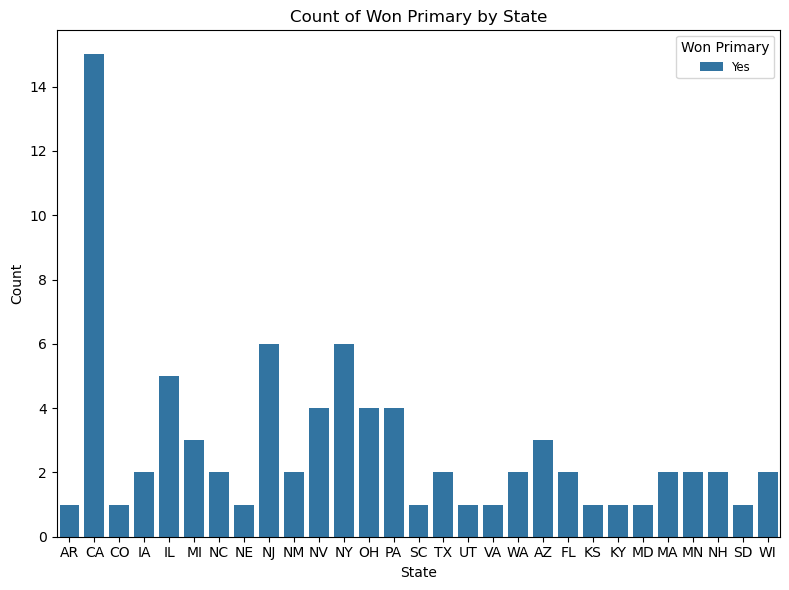

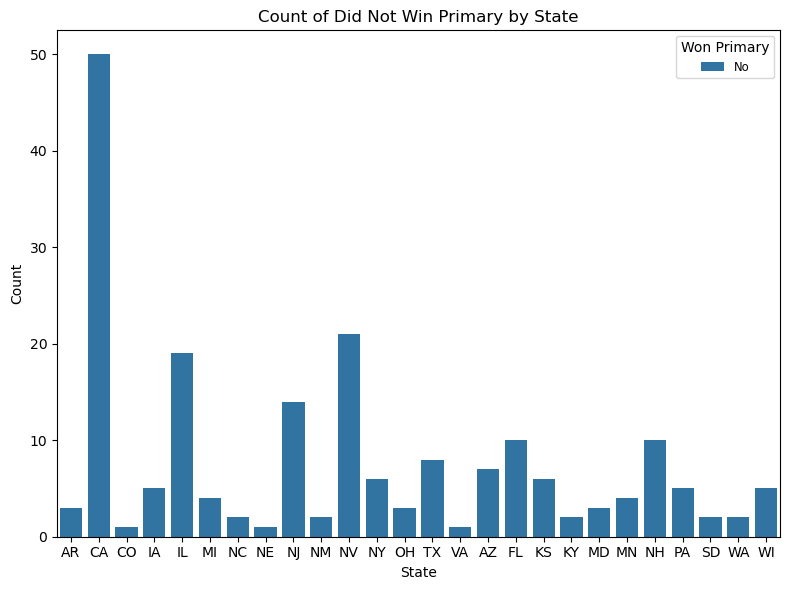

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

dem_candidates = pd.read_csv("dem_candidates (1).csv", encoding='latin1')
rep_candidates = pd.read_csv("rep_candidates (1).csv", encoding='latin1')

dem_candidates['Party'] = 'Democrat'
rep_candidates['Party'] = 'Republican'

rep_candidates['Party Support?'] = rep_candidates['Rep Party Support?']

rep_candidates.drop(columns=['Rep Party Support?'], inplace=True)

combined_df = pd.concat([dem_candidates, rep_candidates], ignore_index=True)

combined_df.dropna(subset=['Party Support?'], inplace=True)

df = combined_df
df_yes = df[df['Party Support?'] == 'Yes']
df_no = df[df['Party Support?'] == 'No']

df_yes2 = df[df['Won Primary'] == 'Yes']
df_no2 = df[df['Won Primary'] == 'No']

plt.figure(figsize=(8, 6))
sns.countplot(data=df_yes, x='State', hue='Party Support?')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of having Party Support Status by State")
plt.legend(title="Party Support", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Party Support", fontsize='small')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_no, x='State', hue='Party Support?')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of not having Party Support Status by State")
plt.legend(title="Party Support", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Party Support", fontsize='small')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_yes2, x='State', hue='Won Primary')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Won Primary by State")
plt.legend(title="Won Primary", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Won Primary", fontsize='small')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_no2, x='State', hue='Won Primary')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Did Not Win Primary by State")
plt.legend(title="Won Primary", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Won Primary", fontsize='small')
plt.tight_layout()
plt.show()

Below is our first visualization for our second research question (“Can we predict whether or not an organization will endorse a candidate based on candidate characteristics?”) showing the distribution of the race of democratic candidates (white vs non white).

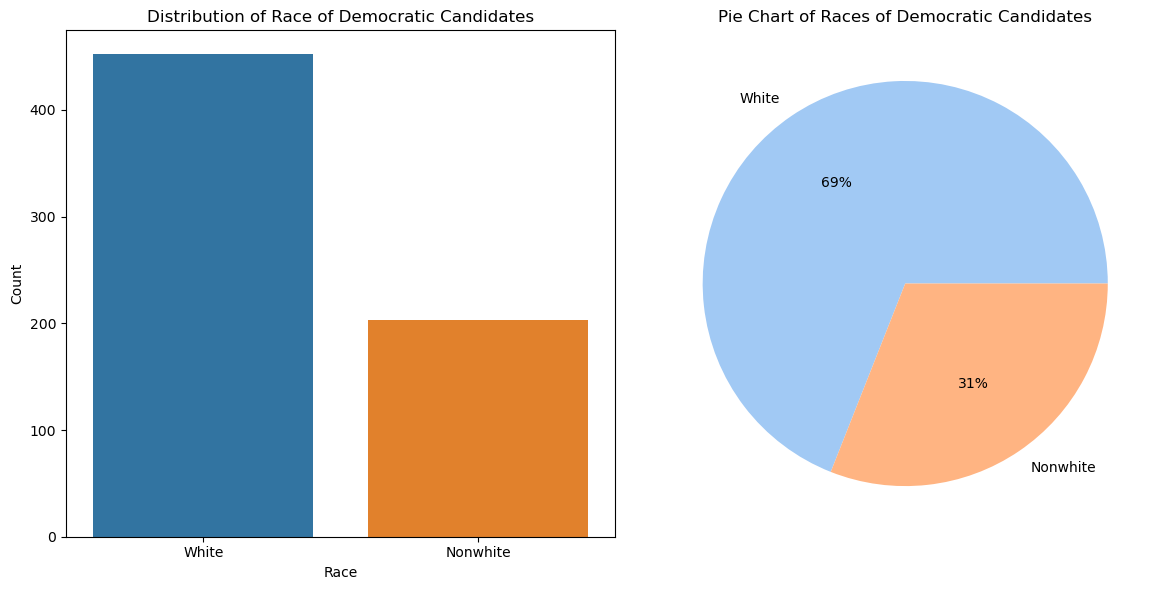

In [22]:
combinedDf = pd.concat([rep, dem])
raceSeries = combinedDf["Race"][combinedDf["Race"].notna()]
final = pd.DataFrame(raceSeries.value_counts()).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=final, x="Race", y="count", ax=axes[0])
axes[0].set_title("Distribution of Race of Democratic Candidates")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Count")

finalCounts = final["count"]
labels = final["Race"]
colors = sns.color_palette('pastel')[0:5]
axes[1].pie(finalCounts, labels=labels, colors=colors, autopct='%.0f%%')
axes[1].set_title("Pie Chart of Races of Democratic Candidates")

plt.tight_layout()

plt.show()

Below is our second visualization for our second research question (“Can we predict whether or not an organization will endorse a candidate based on candidate characteristics?”) showing total endorsements by different candidate characteristics.

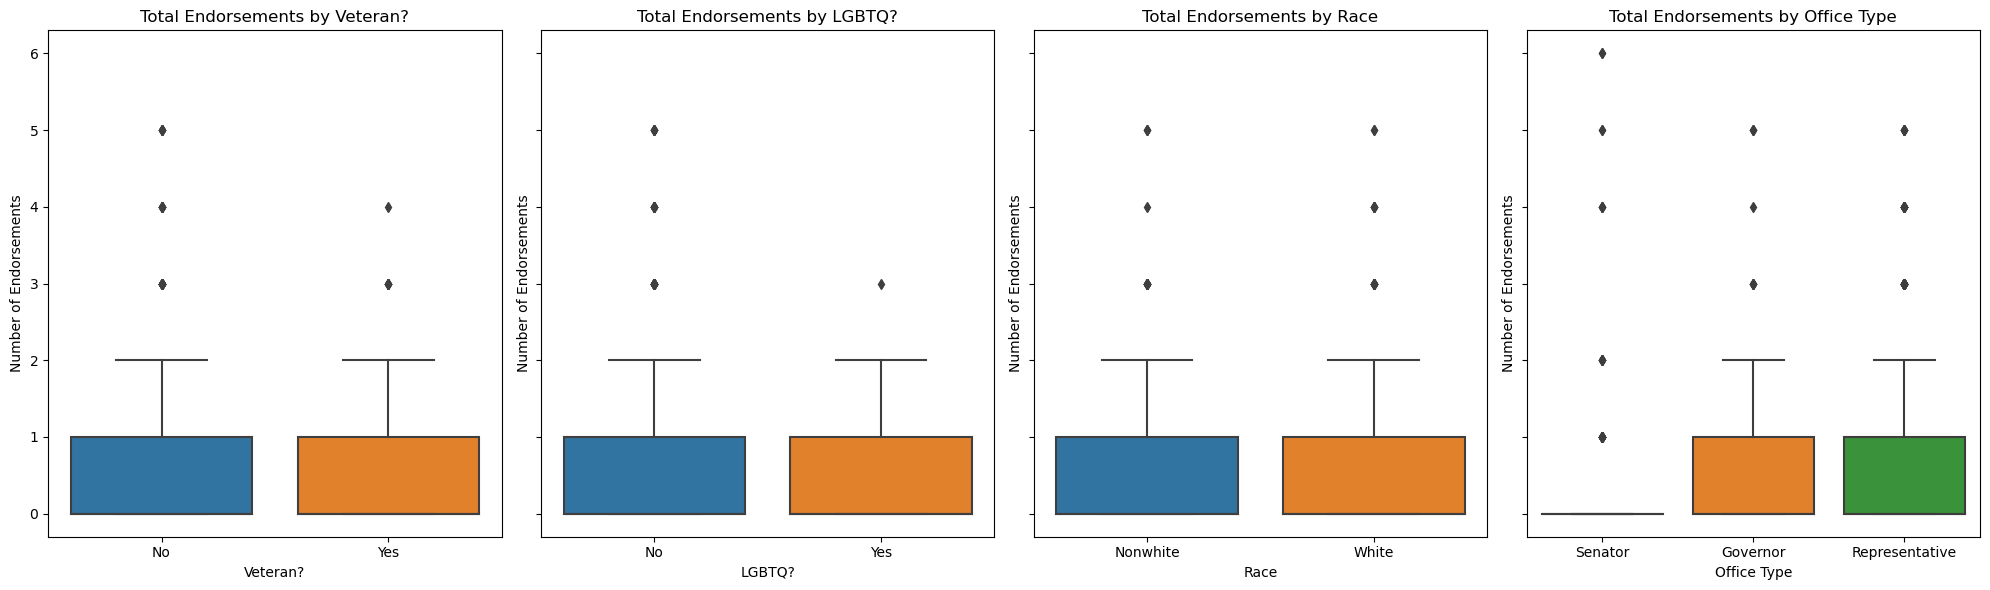

In [21]:
dem_candidates = pd.read_csv("dem_candidates (1).csv", encoding='latin1')
rep_candidates = pd.read_csv("rep_candidates (1).csv", encoding='latin1')

combined_df = pd.concat([dem_candidates, rep_candidates], ignore_index=True)

endorsement_columns = [
    'Emily Endorsed?', 'Guns Sense Candidate?', 'Biden Endorsed?', 
    'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?', 
    'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?', 
    'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?', 
    'Rep Party Support?', 'Trump Endorsed?', 'Bannon Endorsed?', 
    'Great America Endorsed?', 'NRA Endorsed?', 'Right to Life Endorsed?', 
    'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?', 
    'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?', 
    'Main Street Endorsed?', 'Chamber Endorsed?'
]

def endorsement_to_numeric(value):
    if value == "Yes":
        return 1
    else:
        return 0
combined_df['Total Endorsements'] = combined_df[endorsement_columns].applymap(endorsement_to_numeric).sum(axis=1)
combined_df = combined_df.sort_values('Total Endorsements', ascending = False)

categories = ['Veteran?', 'LGBTQ?', 'Race', 'Office Type']

fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(20, 6), sharey=True)

for i, category in enumerate(categories):
    sns.boxplot(x=category, y='Total Endorsements', data=combined_df, ax=axes[i])
    axes[i].set_title(f'Total Endorsements by {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Number of Endorsements')

plt.tight_layout()
plt.show()

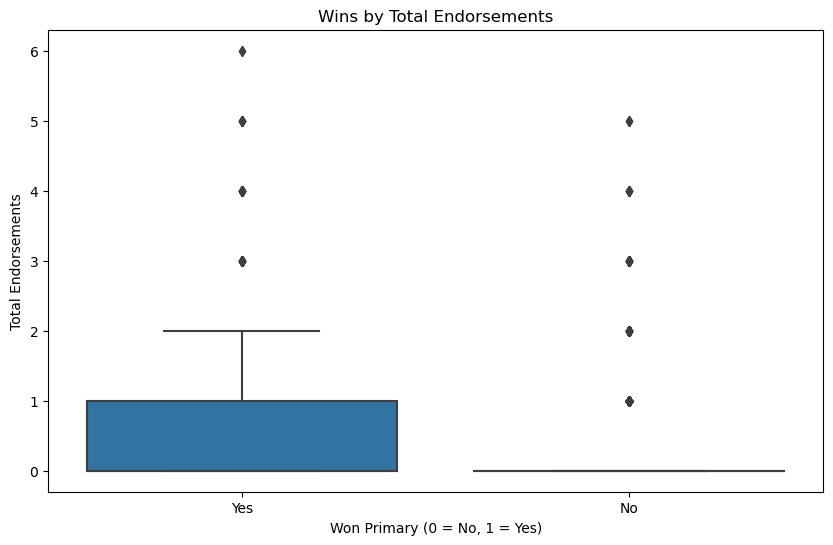

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Won Primary', y='Total Endorsements', data=combined_df)
plt.title('Wins by Total Endorsements')
plt.xlabel('Won Primary (0 = No, 1 = Yes)')
plt.ylabel('Total Endorsements')
plt.show()

Question 1 (“Does party support status cause a change in the likelihood of success in primary elections?”): Below is our code for calculating the causal effect of party support on primary election success. We accounted for state, district, and office type as confounders and calculated the average treatment effect using the estimate_treatment_effect function. We encoded the confounders since all of them were originally categorical variables, and we mapped the binary variables of "Party Support?" (treatment) and "Won Primary" (outcome) to 0 for "No" and 1 for "Yes" in order to carry out inverse propensity weighting and successfully calculate the ATE. 

Creating the tailoring the data frame using encoding for categorical variables and creating vectors for treatment, outcome, and confounding variables:

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import numpy as np

dem_candidates = pd.read_csv("dem_candidates (1).csv", encoding='latin1')
rep_candidates = pd.read_csv("rep_candidates (1).csv", encoding='latin1')

dem_candidates['Party'] = 'Democrat'
rep_candidates['Party'] = 'Republican'

rep_candidates['Party Support?'] = rep_candidates['Rep Party Support?']

rep_candidates.drop(columns=['Rep Party Support?'], inplace=True)

combined_df = pd.concat([dem_candidates, rep_candidates], ignore_index=True)

combined_df.dropna(subset=['Party Support?'], inplace=True)

label_encoder = LabelEncoder()
combined_df['State'] = label_encoder.fit_transform(combined_df['State'])
combined_df['District'] = label_encoder.fit_transform(combined_df['District'])
combined_df['Office Type'] = label_encoder.fit_transform(combined_df['Office Type'])

combined_df['State'] = combined_df['State'].astype(int)
combined_df['District'] = combined_df['District'].astype(int)
combined_df['Office Type'] = combined_df['Office Type'].astype(int)

combined_df['Party Support?'] = combined_df['Party Support?'].map({'Yes': 1, 'No': 0})
combined_df['Won Primary'] = combined_df['Won Primary'].map({'Yes': 1, 'No': 0})

Z = combined_df.iloc[:, 19].values
Y = combined_df.iloc[:, 11].values
X = combined_df.iloc[:, [1, 2, 3]].values
lr = LR(penalty='none', max_iter=200, random_state=0)
lr.fit(X, Z)
e_hat = lr.predict_proba(X)[:, 1]

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Method to calculate average treatment effect:

In [9]:
def estimate_treatment_effect(lr, X, Y, Z):
    e_hat = lr.predict_proba(X)[:, 1]
    numerator = sum((Z * Y / e_hat) - ((1 - Z) * Y / (1 - e_hat)))
    denominator = len(Z)
    tau_hat = numerator / denominator
    return tau_hat

Printing the estimate:

In [10]:
tau_estimate = estimate_treatment_effect(lr, X, Y, Z)
print("Estimated treatment effect:", tau_estimate)

Estimated treatment effect: 0.7189769704923732


Question 2 (“Can we predict whether or not an organization will endorse a candidate based on candidate characteristics?”): Below is our code for creating the GLM based on a logistic regression model and creating a random forests model (nonparametric method) to compare it to. We used the characteristics of race, lgbtq orientation, partisan lean, and veteran status as features to create these two models and calculated statistics such as training accuracy, accuracy, and RMSE to evaluate each model's performance. 

In [11]:
#imports and seed
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.metrics import f1_score
seedR = np.random.seed(9)

Training accuracy, accuracy, and RMSE calculation for random forests model:

In [12]:
organization = "Guns Sense Candidate?"
predictors = ["Partisan Lean", "Race", "Veteran?", "LGBTQ?"]
allMyColumns = predictors + [organization]
demFiltered = dem_candidates[allMyColumns]

demFilNonNull = demFiltered[((demFiltered["Partisan Lean"].notnull()) & (demFiltered["Race"].notnull()) 
& (demFiltered["Veteran?"].notnull()) & (demFiltered["LGBTQ?"].notnull()))]
demFinal = demFilNonNull[demFilNonNull[organization].notnull()]
demFinal = demFinal.replace({"White": 1, "Nonwhite": 0, "Yes": 1, "No": 0})

train ,test = train_test_split(demFinal, test_size = 0.2, random_state = seedR)
X_train, Y_train = train[predictors], train[organization]
X_test, Y_test = test[predictors], test[organization]
model_forest = RandomForestClassifier()
model_forest.fit(X_train, Y_train)
predictions = model_forest.predict(X_test)
testPredictions = model_forest.predict(X_train)
test["Forest Predictions"] = predictions
accuracy = np.mean(test["Forest Predictions"] == test[organization])
trainingAccuracy = np.mean(testPredictions == train[organization])
test_rmse = np.mean((test["Forest Predictions"] - test[organization]) ** 2) ** 0.5
print(f"Training Accuracy: {trainingAccuracy}")
print(f"Accuracy: {accuracy}")
print(f"RMSE: {test_rmse}")

Training Accuracy: 0.8636363636363636
Accuracy: 0.6181818181818182
RMSE: 0.6179143806533247


Feature importance visual:

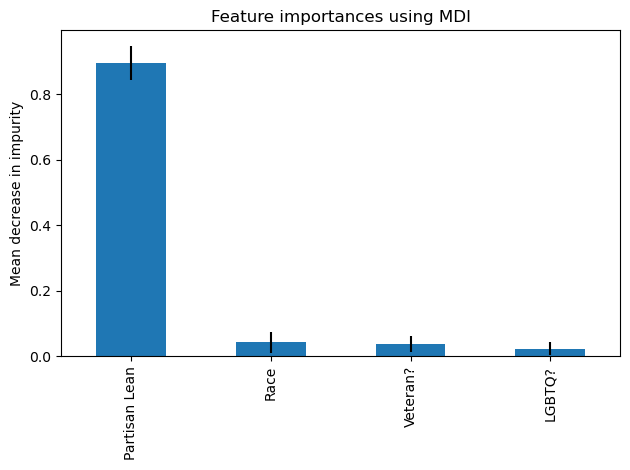

In [13]:
importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=predictors)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Random Forests visual:

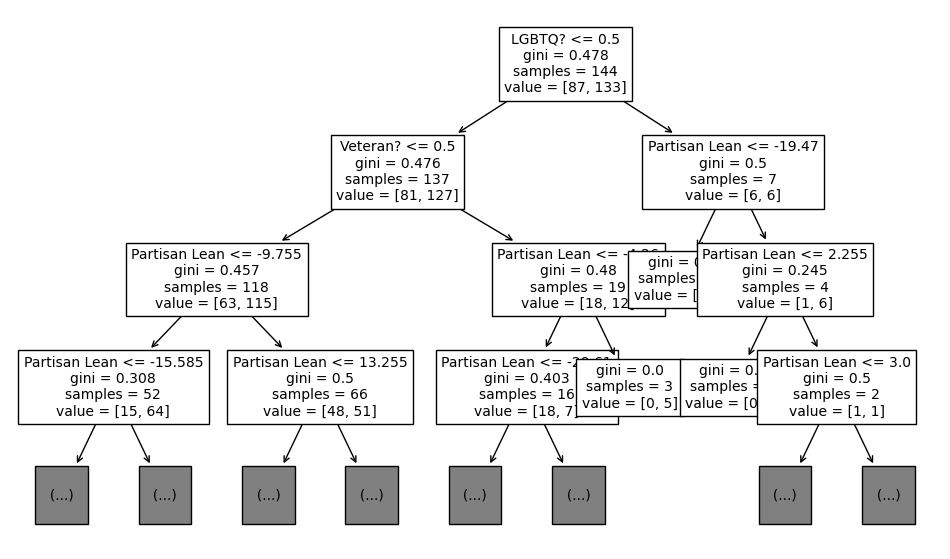

In [14]:
plt.figure(figsize=(12, 7))
plot_tree(model_forest.estimators_[0], max_depth=3, fontsize=10, feature_names=predictors);

GLM results:

In [15]:
log_reg = sm.Logit(Y_train, X_train).fit()
smPred = list(map(round, log_reg.predict(X_test)))
accuracySm = np.mean(np.array(smPred) == test[organization])
f1 = f1_score(test[organization], smPred)
print(log_reg.summary())
print(f"Accuracy: {accuracySm}")
print(f"F1 Score: {f1}")

Optimization terminated successfully.
         Current function value: 0.672660
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Guns Sense Candidate?   No. Observations:                  220
Model:                             Logit   Df Residuals:                      216
Method:                              MLE   Df Model:                            3
Date:                   Tue, 07 May 2024   Pseudo R-squ.:                0.008103
Time:                           05:27:34   Log-Likelihood:                -147.99
converged:                          True   LL-Null:                       -149.19
Covariance Type:               nonrobust   LLR p-value:                    0.4903
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Partisan Lean     0.0019      0.008      0.233      0.816      -0.014       0.